# SUS test of The End of Everything

In [20]:
# Import
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import re
import pandas as pd

In [21]:
# Load the data
df = pd.read_csv("Data/SUSTest1_v1.csv")

In [22]:
# Clean the data

# Extract only the numeric response (e.g., "4 (Agree)" → 4)
def extract_numeric(response):
    match = re.match(r"(\d)", str(response))
    return int(match.group(1)) if match else None

# Columns corresponding to each SUS statement
sus_columns = [
    "STATEMENT 1: “I think that I would like to use this system frequently.”",
    "STATEMENT 2: “I found the system unnecessarily complex.”",
    "STATEMENT 3: “I thought the system was easy to use.”",
    "STATEMENT 4: “I think that I would need the support of a technical person to use this system.”",
    "STATEMENT 5: “I found the various functions in this system were well integrated.”",
    "STATEMENT 6: “I thought there was too much inconsistency in this system.”",
    "STATEMENT 7: “I would imagine that most people would learn to use this system very quickly.”",
    "STATEMENT 8: “I found the system very cumbersome to use.”",
    "STATEMENT 9: “I felt very confident using the system.”",
    "STATEMENT 10: ”I needed to learn a lot of things before I could get going with this system.”"
]

# Apply extraction to the SUS columns
sus_numeric = df[sus_columns].applymap(extract_numeric)

In [23]:
# Compute adjusted scores
adjusted_scores = sus_numeric.copy()
for i in range(10):
    if (i + 1) % 2 == 1:  # Odd-numbered (positive) questions
        adjusted_scores.iloc[:, i] = sus_numeric.iloc[:, i] - 1
    else:  # Even-numbered (negative) questions
        adjusted_scores.iloc[:, i] = 5 - sus_numeric.iloc[:, i]

# Sum and compute final SUS score
df["SUS Score"] = adjusted_scores.sum(axis=1) * 2.5

In [24]:
# Print the results
print(df[["SUS Score"]])
df["SUS Score"].describe()

   SUS Score
0       75.0
1       92.5
2       72.5
3       92.5
4       70.0


count     5.000000
mean     80.500000
std      11.096171
min      70.000000
25%      72.500000
50%      75.000000
75%      92.500000
max      92.500000
Name: SUS Score, dtype: float64

((array([-1.12899754, -0.48565271,  0.        ,  0.48565271,  1.12899754]),
  array([70. , 72.5, 75. , 92.5, 92.5])),
 (11.623845906905478, 80.5, 0.9103768902687704))

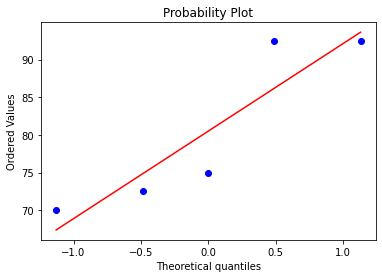

In [25]:
# Plot the results
stats.probplot(df["SUS Score"], plot=plt)

In [26]:
# T-test
mean = df["SUS Score"].mean()
sem = stats.sem(df["SUS Score"])
ci = stats.t.interval(0.95, len(df["SUS Score"])-1, loc=mean, scale=sem)
print(f"95% CI: {ci}")

95% CI: (66.72228455907496, 94.27771544092504)
